In [1]:
import os
from os.path import join as ojoin

In [2]:
sim_dir = ojoin('..', 'simulation_results') 

In [17]:
directories = dict()
directories['tim'] = ojoin(sim_dir, 'tim')
problems = dict()
problems['fairim'] = ['group_maximin', 'dc']
problems['mip'] = problems['fairim'] + ['equality', 'equity']

for approach in ('mip', 'fairim'):
    for problem in problems[approach]:
        for attribute in ('age', 'gender', 'ethnicity'):
            directories[(approach, problem, attribute)] = ojoin(sim_dir, approach, problem, attribute)

In [10]:
def extract_coverage(fpath):
    total_coverage = 0
    with open(fpath) as f:
        for line in f:
            line = line.strip()
            if not line: continue
            total_coverage += float(line)
    return total_coverage

def extract_coverage_list(dpath):
    coverages = []
    for i in range(20):
        fpath = ojoin(dpath, 'output_%d.txt'%i)
        coverage = extract_coverage(fpath)
        coverages.append(coverage)
    return coverages

In [19]:
coverage_lists = dict()
for key in directories.keys():
    coverage_lists[key] = extract_coverage_list(directories[key])

In [69]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np



def draw(values, labels, colors, title, ylabel, fpath):
    plt.figure()
    means = [np.mean(v) for v in values]
    stds = [np.std(v) for v in values]
    xpos = range(len(keys))

    bars = plt.bar(xpos, means, yerr=stds, align='center', capsize=4)
    for i in xpos:
        bars[i].set_color(colors[i])
    _ = plt.xticks(xpos, labels, rotation=90, fontsize=12)

    _ = plt.ylabel(ylabel, fontsize=15)
    _ = plt.title(title, fontsize=18)
    _ = plt.savefig(fpath, bbox_inches='tight')
    

### Plots 1 to 3
In the first three plot we present the total coverage obtained by these methods, for groups *age*, *gender*, and *ethinicity*:
- tim
- equity (MIP)
- equality (MIP)
- group maximin (MIP)
- DC (MIP)



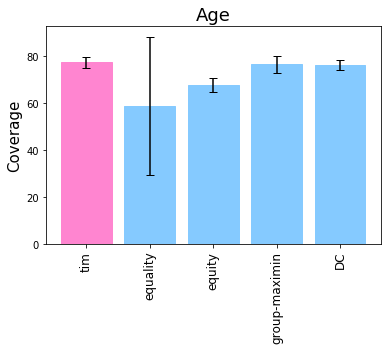

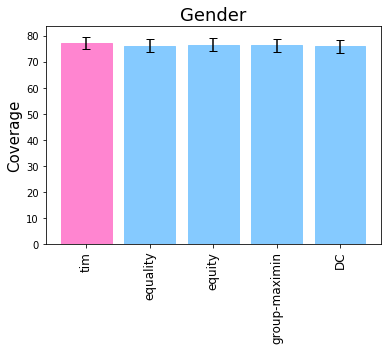

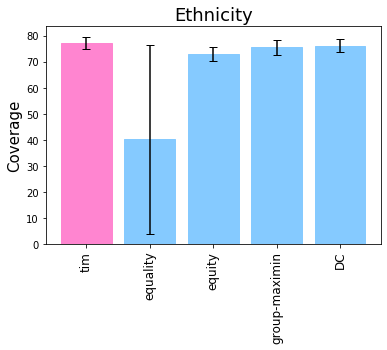

In [71]:
labels = ['tim', 'equality', 'equity', 'group-maximin', 'DC']
colors = ['#ff85d0'] + ['#85caff'] * 4

for attribtue in ('age', 'gender', 'ethnicity'):
    keys = ['tim', ('mip', 'equality', attribtue), ('mip', 'equity', attribtue), 
            ('mip', 'group_maximin', attribtue), ('mip', 'dc', attribtue)]
    values = [np.array(coverage_lists[key]) for key in keys]
    title = attribtue[0].upper() + attribtue[1:]
    fpath = 'images/mip_coverage/%s.svg'%attribtue
    draw(values, labels, colors, title, 'Coverage', fpath)

### Plot 2 to 6
In the second plot we present the total coverage obtained by these methods, for groups *age*, *gender*, and *ethinicity*:
- group maximin (MIP)
- group maximin (fairIM)
- DC (MIP)
- DC (fairIM)

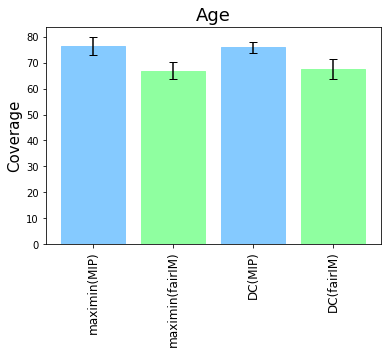

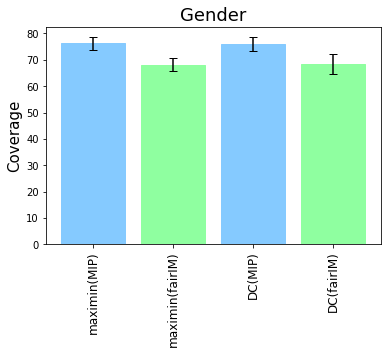

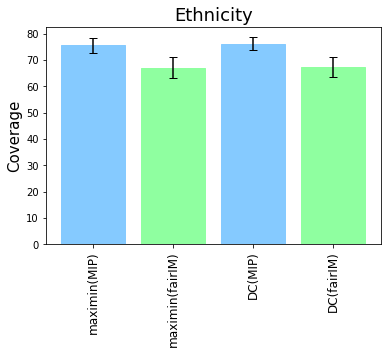

In [72]:
labels = ['maximin(MIP)', 'maximin(fairIM)', 'DC(MIP)', 'DC(fairIM)']
colors = ['#85caff', '#8fffa0'] * 2

for attribtue in ('age', 'gender', 'ethnicity'):
    keys = [('mip', 'group_maximin', attribtue), 
            ('fairim', 'group_maximin', attribtue), 
            ('mip', 'dc', attribtue), 
            ('fairim', 'dc', attribtue)]
    values = [np.array(coverage_lists[key]) for key in keys]
    title = attribtue[0].upper() + attribtue[1:]
    fpath = 'images/mip_vs_fairim/%s.svg'%attribtue
    draw(values, labels, colors, title, 'Coverage', fpath)